# **BOOTCAMP @ GIKI (Content designed by Usama Arshad) WEEK 2**

**Lab sessions you will conduct:**

---



*   Lab 6: Implementing SVM, Decision Trees, and Evaluation Metrics (Day 6)
* Lab 7: Implementing Unsupervised Learning Algorithms (Day 7)
* Lab 8: Feature Engineering and Model Selection Techniques (Day 8)
* **Lab 9: Implementing Regression Models (Day 9)**
* Lab 10: Implementing Classification Models (Day 10)

### Linear Regression with Preprocessing: Theory and Implementation


---


#### Introduction
Linear Regression is a fundamental machine learning algorithm used for predicting a continuous target variable based on one or more input features. It assumes a linear relationship between the input features and the target variable.

#### California Housing Dataset
The California Housing dataset is used in this example. It contains information about housing prices in California, with features such as the average number of rooms, population, median income, etc., and the target variable being the median house value.

#### Steps Involved

**Loading the Dataset:**
The dataset is loaded using the `fetch_california_housing` function from the `scikit-learn` library and converted into a pandas DataFrame for easier handling.

**Dataset Information:**

- **Number of Instances**: The total number of data points in the dataset.
- **Number of Features**: The number of input features used for prediction.
- **Target Variable**: The variable we aim to predict, which in this case is the median house value (`MedHouseVal`).

**Data Visualization:**

- **Scatter Plot**: A scatter plot is used to visualize the relationship between the selected feature and the target variable. This helps in understanding how the feature influences the target.

**Preprocessing:**

- **Standard Scaler**: Scales the data so that it has a mean of 0 and a standard deviation of 1. Useful when the data has varying scales.
- **Min-Max Scaler**: Scales the data to a fixed range, usually 0 to 1. Useful when the data needs to be normalized.
- **Robust Scaler**: Scales the data using statistics that are robust to outliers. Useful when the data contains outliers.

**Linear Regression:**

- **Training the Model**: The model is trained on the training data. The relationship between the input feature and the target variable is learned.
- **Evaluating the Model**: The model's performance is evaluated using metrics such as Mean Squared Error (MSE) and R-squared (R²) score.
  - **MSE**: Measures the average squared difference between the actual and predicted values. Lower MSE indicates a better fit.
  - **R² Score**: Indicates the proportion of the variance in the target variable that is predictable from the features. An R² score close to 1 indicates a better fit.

**Visualization of the Model:**

- **Regression Line on Training Data**: Shows how well the model fits the training data.
- **Regression Line on Test Data**: Shows how well the model generalizes to unseen data.

**Making Predictions:**

The trained model is used to make predictions on new input values. If preprocessing was applied during training, the same preprocessing is applied to the input values before making predictions.

---


In [6]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import ipywidgets as widgets
from IPython.display import display, Markdown

# Load the California Housing dataset from scikit-learn
housing = fetch_california_housing()

# Convert the dataset to a pandas DataFrame for easier handling
data = pd.DataFrame(housing.data, columns=housing.feature_names)
data['MedHouseVal'] = housing.target  # Add the target column (median house value) to the DataFrame

# Function to display dataset information
def display_data_info():
    # Display the dataset information and structure
    display(Markdown("### Dataset Information"))
    display(Markdown("The California Housing dataset contains information about housing prices in California."))
    display(Markdown(f"**Number of instances:** {data.shape[0]}"))
    display(Markdown(f"**Number of features:** {data.shape[1] - 1}"))
    display(Markdown(f"**Features:** {', '.join(housing.feature_names)}"))
    display(Markdown("**Target:** MedHouseVal (Median House Value)"))
    display(Markdown("### First 5 Rows of the Dataset"))
    display(data.head())  # Display the first 5 rows of the dataset

# Function to visualize the dataset
def visualize_data(feature, preprocess):
    # Select the feature and the target from the dataset
    X = data[[feature]].values  # Feature
    y = data['MedHouseVal'].values  # Target

    # Preprocess the feature if selected
    if preprocess == 'Standard Scaler':
        scaler = StandardScaler()
        X = scaler.fit_transform(X)
    elif preprocess == 'Min-Max Scaler':
        scaler = MinMaxScaler()
        X = scaler.fit_transform(X)
    elif preprocess == 'Robust Scaler':
        scaler = RobustScaler()
        X = scaler.fit_transform(X)

    # Create a scatter plot to visualize the relationship between the selected feature and the target
    plt.scatter(X, y, color='blue', label='Data points')
    plt.title(f'{feature} vs Median House Value')
    plt.xlabel(feature)
    plt.ylabel('Median House Value')
    plt.legend()
    plt.show()
    # Display explanation of the visualization
    display(Markdown(f"### Visualization of {feature}"))
    display(Markdown(f"This scatter plot shows the relationship between the selected feature **{feature}** and the target variable **Median House Value**. Each blue point represents a data instance from the dataset. If preprocessing was selected, the feature values have been scaled accordingly."))

# Function to perform Linear Regression with preprocessing
def perform_linear_regression(feature, preprocess):
    # Select the feature and the target from the dataset
    X = data[[feature]].values  # Feature
    y = data['MedHouseVal'].values  # Target

    # Preprocess the feature if selected
    scaler = None
    if preprocess == 'Standard Scaler':
        scaler = StandardScaler()
        X = scaler.fit_transform(X)
    elif preprocess == 'Min-Max Scaler':
        scaler = MinMaxScaler()
        X = scaler.fit_transform(X)
    elif preprocess == 'Robust Scaler':
        scaler = RobustScaler()
        X = scaler.fit_transform(X)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Create a Linear Regression model
    model = LinearRegression()

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model using Mean Squared Error (MSE) and R-squared (R²) score
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Display the evaluation metrics
    display(Markdown("### Model Evaluation"))
    display(Markdown(f"**Mean Squared Error:** {mse}"))
    display(Markdown(f"**R^2 Score:** {r2}"))
    display(Markdown("The Mean Squared Error (MSE) measures the average squared difference between the actual and predicted values. A lower MSE indicates a better fit. The R² Score indicates the proportion of the variance in the target variable that is predictable from the features. An R² score close to 1 indicates a better fit."))

    # Plot the regression line on the training data
    plt.scatter(X_train, y_train, color='blue', label='Training data')
    plt.plot(X_train, model.predict(X_train), color='red', label='Regression line')
    plt.title('Linear Regression on Training Data')
    plt.xlabel(feature)
    plt.ylabel('Median House Value')
    plt.legend()
    plt.show()
    display(Markdown(f"### Linear Regression on Training Data"))
    display(Markdown("This plot shows the Linear Regression model fitted on the training data. The blue points represent the training data, and the red line represents the regression line fitted by the model."))

    # Plot the regression line on the test data
    plt.scatter(X_test, y_test, color='blue', label='Testing data')
    plt.plot(X_test, y_pred, color='red', label='Regression line')
    plt.title('Linear Regression on Test Data')
    plt.xlabel(feature)
    plt.ylabel('Median House Value')
    plt.legend()
    plt.show()
    display(Markdown(f"### Linear Regression on Test Data"))
    display(Markdown("This plot shows the Linear Regression model predictions on the test data. The blue points represent the test data, and the red line represents the regression line predicted by the model. Comparing this plot with the training data plot helps to assess the model's performance on unseen data."))

    return model, scaler

# Function to make predictions with new input values
def make_predictions(model, scaler, feature, input_value):
    # Preprocess the input value if a scaler is provided
    if scaler:
        input_value = scaler.transform(np.array([[input_value]]))

    # Make prediction
    prediction = model.predict(input_value)

    # Display the prediction
    display(Markdown(f"### Prediction for {feature} = {input_value[0][0] if scaler else input_value[0]}"))
    display(Markdown(f"**Predicted Median House Value:** {prediction[0]}"))

# Create a dropdown widget for selecting the feature to visualize and use for Linear Regression
feature_dropdown = widgets.Dropdown(
    options=housing.feature_names,
    value='AveRooms',  # Default value
    description='Feature:',
    disabled=False,
)

# Create a dropdown widget for selecting the preprocessing method
preprocess_dropdown = widgets.Dropdown(
    options=['None', 'Standard Scaler', 'Min-Max Scaler', 'Robust Scaler'],
    value='None',  # Default value
    description='Preprocess:',
    disabled=False,
)

# Create a float input widget for entering a new value to make predictions
input_value = widgets.FloatText(
    value=0.0,
    description='Input Value:',
    disabled=False,
)

# Create buttons for interactive actions
display_data_button = widgets.Button(description="Display Dataset Info")
visualize_data_button = widgets.Button(description="Visualize Data")
perform_lr_button = widgets.Button(description="Perform Linear Regression")
predict_button = widgets.Button(description="Make Prediction")

# Display the button for showing dataset information
display(display_data_button)
# Attach the display_data_info function to the button click event
display_data_button.on_click(lambda b: display_data_info())

# Display the dropdowns and button for visualizing data
display(feature_dropdown)
display(preprocess_dropdown)
display(visualize_data_button)
# Attach the visualize_data function to the button click event
visualize_data_button.on_click(lambda b: visualize_data(feature_dropdown.value, preprocess_dropdown.value))

# Display the dropdowns and button for performing Linear Regression
display(perform_lr_button)
# Initialize variables for model and scaler
model = None
scaler = None
# Attach the perform_linear_regression function to the button click event
def perform_lr_action(b):
    global model, scaler
    model, scaler = perform_linear_regression(feature_dropdown.value, preprocess_dropdown.value)

perform_lr_button.on_click(perform_lr_action)

# Display the float input and button for making predictions
display(input_value)
display(predict_button)
# Attach the make_predictions function to the button click event
predict_button.on_click(lambda b: make_predictions(model, scaler, feature_dropdown.value, input_value.value))


Button(description='Display Dataset Info', style=ButtonStyle())

Dropdown(description='Feature:', index=2, options=('MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population'…

Dropdown(description='Preprocess:', options=('None', 'Standard Scaler', 'Min-Max Scaler', 'Robust Scaler'), va…

Button(description='Visualize Data', style=ButtonStyle())

Button(description='Perform Linear Regression', style=ButtonStyle())

FloatText(value=0.0, description='Input Value:')

Button(description='Make Prediction', style=ButtonStyle())


### Polynomial Regression: Theory and Implementation


---



#### Introduction
Polynomial Regression is an extension of Linear Regression where the relationship between the independent variable (or variables) and the dependent variable is modeled as an nth degree polynomial. This allows for capturing more complex relationships that are not possible with a straight line.

#### California Housing Dataset
The California Housing dataset is used in this example. It contains information about housing prices in California, with features such as the average number of rooms, population, median income, etc., and the target variable being the median house value.

#### Steps Involved

**Loading the Dataset:**
The dataset is loaded using the `fetch_california_housing` function from the `scikit-learn` library and converted into a pandas DataFrame for easier handling.

**Dataset Information:**

- **Number of Instances**: The total number of data points in the dataset.
- **Number of Features**: The number of input features used for prediction.
- **Target Variable**: The variable we aim to predict, which in this case is the median house value (`MedHouseVal`).

**Data Visualization:**

- **Scatter Plot**: A scatter plot is used to visualize the relationship between the selected feature and the target variable. This helps in understanding how the feature influences the target.

**Preprocessing:**

- **Standard Scaler**: Scales the data so that it has a mean of 0 and a standard deviation of 1. Useful when the data has varying scales.
- **Min-Max Scaler**: Scales the data to a fixed range, usually 0 to 1. Useful when the data needs to be normalized.
- **Robust Scaler**: Scales the data using statistics that are robust to outliers. Useful when the data contains outliers.

**Polynomial Regression:**

- **Degree**: The degree of the polynomial refers to the highest power of the input variable in the polynomial equation.
  - **Degree 1 (Linear Regression)**: A straight line, simple and effective for linear relationships.
  - **Degree 2 (Quadratic Regression)**: Adds a squared term, allowing the model to capture curvature.
  - **Degree 3 (Cubic Regression)**: Adds a cubic term, capturing more complex relationships.
  - **Higher Degrees**: Allow for even more complex relationships but can lead to overfitting.

- **Creating Polynomial Features**: Using the `PolynomialFeatures` class to generate polynomial features up to the specified degree.

**Training the Model:**
- The model is trained on the polynomial features of the training data. The relationship between the input features and the target variable is learned.

**Evaluating the Model:**
- The model's performance is evaluated using metrics such as Mean Squared Error (MSE) and R-squared (R²) score.
  - **MSE**: Measures the average squared difference between the actual and predicted values. Lower MSE indicates a better fit.
  - **R² Score**: Indicates the proportion of the variance in the target variable that is predictable from the features. An R² score close to 1 indicates a better fit.

**Visualization of the Model:**

- **Regression Curve on Training Data**: Shows how well the model fits the training data.
- **Regression Curve on Test Data**: Shows how well the model generalizes to unseen data.

**Making Predictions:**

The trained model is used to make predictions on new input values. If preprocessing was applied during training, the same preprocessing is applied to the input values before making predictions.

---



Button(description='Display Dataset Info', style=ButtonStyle())

Dropdown(description='Feature:', index=2, options=('MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population'…

Dropdown(description='Preprocess:', options=('None', 'Standard Scaler', 'Min-Max Scaler', 'Robust Scaler'), va…

Button(description='Visualize Data', style=ButtonStyle())

Dropdown(description='Regression Type:', options=('Linear Regression', 'Polynomial Regression'), value='Linear…

Dropdown(description='Preprocess:', options=('None', 'Standard Scaler', 'Min-Max Scaler', 'Robust Scaler'), va…

Dropdown(description='Feature:', index=2, options=('MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population'…

IntText(value=2, description='Degree:')

Button(description='Perform Regression', style=ButtonStyle())

FloatText(value=0.0, description='Input Value:')

Button(description='Make Prediction', style=ButtonStyle())

### Dataset Information

The California Housing dataset contains information about housing prices in California.

**Number of instances:** 20640

**Number of features:** 8

**Features:** MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude

**Target:** MedHouseVal (Median House Value)

### First 5 Rows of the Dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


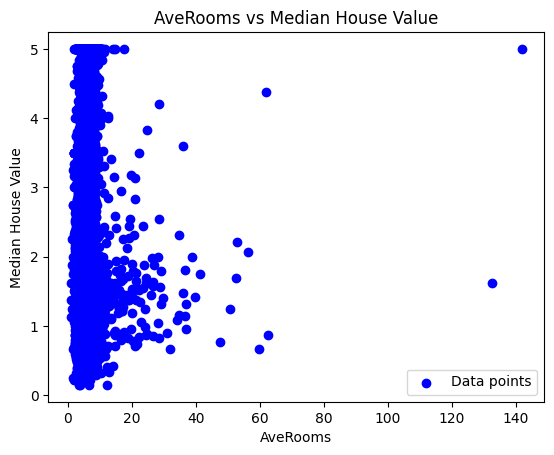

### Visualization of AveRooms

This scatter plot shows the relationship between the selected feature **AveRooms** and the target variable **Median House Value**. Each blue point represents a data instance from the dataset. If preprocessing was selected, the feature values have been scaled accordingly.

### Model Evaluation

**Mean Squared Error:** 1.227745454439949

**R^2 Score:** 0.05844484938822725

The Mean Squared Error (MSE) measures the average squared difference between the actual and predicted values. A lower MSE indicates a better fit. The R² Score indicates the proportion of the variance in the target variable that is predictable from the features. An R² score close to 1 indicates a better fit.

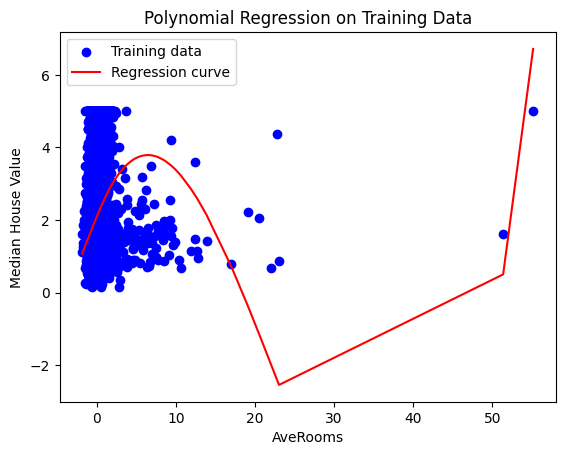

### Polynomial Regression on Training Data

This plot shows the Polynomial Regression model fitted on the training data. The blue points represent the training data, and the red curve represents the regression curve fitted by the model.

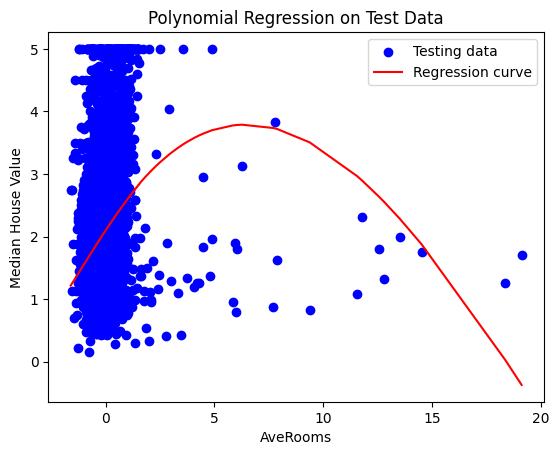

### Polynomial Regression on Test Data

This plot shows the Polynomial Regression model predictions on the test data. The blue points represent the test data, and the red curve represents the regression curve predicted by the model. Comparing this plot with the training data plot helps to assess the model's performance on unseen data.

### Model Evaluation

**Mean Squared Error:** 1.2689241420356616

**R^2 Score:** 0.0268650090711946

The Mean Squared Error (MSE) measures the average squared difference between the actual and predicted values. A lower MSE indicates a better fit. The R² Score indicates the proportion of the variance in the target variable that is predictable from the features. An R² score close to 1 indicates a better fit.

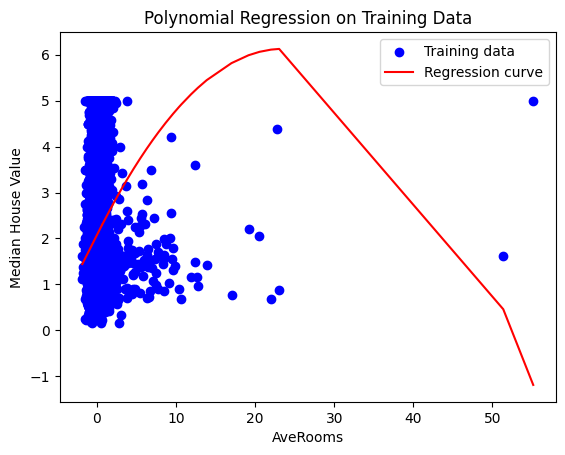

### Polynomial Regression on Training Data

This plot shows the Polynomial Regression model fitted on the training data. The blue points represent the training data, and the red curve represents the regression curve fitted by the model.

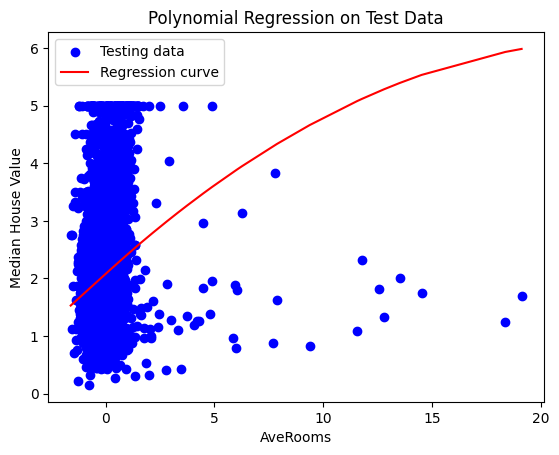

### Polynomial Regression on Test Data

This plot shows the Polynomial Regression model predictions on the test data. The blue points represent the test data, and the red curve represents the regression curve predicted by the model. Comparing this plot with the training data plot helps to assess the model's performance on unseen data.

### Prediction for AveRooms = 6.778590503454601

**Predicted Median House Value:** 4.076109576398228

In [7]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, r2_score
import ipywidgets as widgets
from IPython.display import display, Markdown

# Load the California Housing dataset from scikit-learn
housing = fetch_california_housing()

# Convert the dataset to a pandas DataFrame for easier handling
data = pd.DataFrame(housing.data, columns=housing.feature_names)
data['MedHouseVal'] = housing.target  # Add the target column (median house value) to the DataFrame

# Function to display dataset information
def display_data_info():
    # Display the dataset information and structure
    display(Markdown("### Dataset Information"))
    display(Markdown("The California Housing dataset contains information about housing prices in California."))
    display(Markdown(f"**Number of instances:** {data.shape[0]}"))
    display(Markdown(f"**Number of features:** {data.shape[1] - 1}"))
    display(Markdown(f"**Features:** {', '.join(housing.feature_names)}"))
    display(Markdown("**Target:** MedHouseVal (Median House Value)"))
    display(Markdown("### First 5 Rows of the Dataset"))
    display(data.head())  # Display the first 5 rows of the dataset

# Function to visualize the dataset
def visualize_data(feature, preprocess):
    # Select the feature and the target from the dataset
    X = data[[feature]].values  # Feature
    y = data['MedHouseVal'].values  # Target

    # Preprocess the feature if selected
    if preprocess == 'Standard Scaler':
        scaler = StandardScaler()
        X = scaler.fit_transform(X)
    elif preprocess == 'Min-Max Scaler':
        scaler = MinMaxScaler()
        X = scaler.fit_transform(X)
    elif preprocess == 'Robust Scaler':
        scaler = RobustScaler()
        X = scaler.fit_transform(X)

    # Create a scatter plot to visualize the relationship between the selected feature and the target
    plt.scatter(X, y, color='blue', label='Data points')
    plt.title(f'{feature} vs Median House Value')
    plt.xlabel(feature)
    plt.ylabel('Median House Value')
    plt.legend()
    plt.show()
    # Display explanation of the visualization
    display(Markdown(f"### Visualization of {feature}"))
    display(Markdown(f"This scatter plot shows the relationship between the selected feature **{feature}** and the target variable **Median House Value**. Each blue point represents a data instance from the dataset. If preprocessing was selected, the feature values have been scaled accordingly."))

# Function to perform Linear Regression with preprocessing
def perform_linear_regression(feature, preprocess):
    # Select the feature and the target from the dataset
    X = data[[feature]].values  # Feature
    y = data['MedHouseVal'].values  # Target

    # Preprocess the feature if selected
    scaler = None
    if preprocess == 'Standard Scaler':
        scaler = StandardScaler()
        X = scaler.fit_transform(X)
    elif preprocess == 'Min-Max Scaler':
        scaler = MinMaxScaler()
        X = scaler.fit_transform(X)
    elif preprocess == 'Robust Scaler':
        scaler = RobustScaler()
        X = scaler.fit_transform(X)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Create a Linear Regression model
    model = LinearRegression()

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model using Mean Squared Error (MSE) and R-squared (R²) score
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Display the evaluation metrics
    display(Markdown("### Model Evaluation"))
    display(Markdown(f"**Mean Squared Error:** {mse}"))
    display(Markdown(f"**R^2 Score:** {r2}"))
    display(Markdown("The Mean Squared Error (MSE) measures the average squared difference between the actual and predicted values. A lower MSE indicates a better fit. The R² Score indicates the proportion of the variance in the target variable that is predictable from the features. An R² score close to 1 indicates a better fit."))

    # Plot the regression line on the training data
    plt.scatter(X_train, y_train, color='blue', label='Training data')
    plt.plot(X_train, model.predict(X_train), color='red', label='Regression line')
    plt.title('Linear Regression on Training Data')
    plt.xlabel(feature)
    plt.ylabel('Median House Value')
    plt.legend()
    plt.show()
    display(Markdown(f"### Linear Regression on Training Data"))
    display(Markdown("This plot shows the Linear Regression model fitted on the training data. The blue points represent the training data, and the red line represents the regression line fitted by the model."))

    # Plot the regression line on the test data
    plt.scatter(X_test, y_test, color='blue', label='Testing data')
    plt.plot(X_test, y_pred, color='red', label='Regression line')
    plt.title('Linear Regression on Test Data')
    plt.xlabel(feature)
    plt.ylabel('Median House Value')
    plt.legend()
    plt.show()
    display(Markdown(f"### Linear Regression on Test Data"))
    display(Markdown("This plot shows the Linear Regression model predictions on the test data. The blue points represent the test data, and the red line represents the regression line predicted by the model. Comparing this plot with the training data plot helps to assess the model's performance on unseen data."))

    return model, scaler

# Function to perform Polynomial Regression with preprocessing
def perform_polynomial_regression(feature, preprocess, degree):
    # Select the feature and the target from the dataset
    X = data[[feature]].values  # Feature
    y = data['MedHouseVal'].values  # Target

    # Preprocess the feature if selected
    scaler = None
    if preprocess == 'Standard Scaler':
        scaler = StandardScaler()
        X = scaler.fit_transform(X)
    elif preprocess == 'Min-Max Scaler':
        scaler = MinMaxScaler()
        X = scaler.fit_transform(X)
    elif preprocess == 'Robust Scaler':
        scaler = RobustScaler()
        X = scaler.fit_transform(X)

    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)

    # Create a Linear Regression model
    model = LinearRegression()

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model using Mean Squared Error (MSE) and R-squared (R²) score
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Display the evaluation metrics
    display(Markdown("### Model Evaluation"))
    display(Markdown(f"**Mean Squared Error:** {mse}"))
    display(Markdown(f"**R^2 Score:** {r2}"))
    display(Markdown("The Mean Squared Error (MSE) measures the average squared difference between the actual and predicted values. A lower MSE indicates a better fit. The R² Score indicates the proportion of the variance in the target variable that is predictable from the features. An R² score close to 1 indicates a better fit."))

    # Plot the regression curve on the training data
    plt.scatter(X_train[:, 1], y_train, color='blue', label='Training data')
    plt.plot(np.sort(X_train[:, 1]), model.predict(np.sort(X_train, axis=0)), color='red', label='Regression curve')
    plt.title('Polynomial Regression on Training Data')
    plt.xlabel(feature)
    plt.ylabel('Median House Value')
    plt.legend()
    plt.show()
    display(Markdown(f"### Polynomial Regression on Training Data"))
    display(Markdown("This plot shows the Polynomial Regression model fitted on the training data. The blue points represent the training data, and the red curve represents the regression curve fitted by the model."))

    # Plot the regression curve on the test data
    plt.scatter(X_test[:, 1], y_test, color='blue', label='Testing data')
    plt.plot(np.sort(X_test[:, 1]), model.predict(np.sort(X_test, axis=0)), color='red', label='Regression curve')
    plt.title('Polynomial Regression on Test Data')
    plt.xlabel(feature)
    plt.ylabel('Median House Value')
    plt.legend()
    plt.show()
    display(Markdown(f"### Polynomial Regression on Test Data"))
    display(Markdown("This plot shows the Polynomial Regression model predictions on the test data. The blue points represent the test data, and the red curve represents the regression curve predicted by the model. Comparing this plot with the training data plot helps to assess the model's performance on unseen data."))

    return model, scaler, poly

# Function to make predictions with new input values
def make_predictions(model, scaler, poly, feature, input_value, regression_type):
    # Preprocess the input value if a scaler is provided
    if scaler:
        input_value = scaler.transform(np.array([[input_value]]))

    # Create polynomial features if Polynomial Regression is selected
    if regression_type == 'Polynomial Regression':
        input_value = poly.transform(input_value)

    # Make prediction
    prediction = model.predict(input_value)

    # Display the prediction
    display(Markdown(f"### Prediction for {feature} = {input_value[0][0] if scaler is None else input_value[0][1]}"))
    display(Markdown(f"**Predicted Median House Value:** {prediction[0]}"))

# Create a dropdown widget for selecting the feature to visualize and use for Linear Regression
feature_dropdown = widgets.Dropdown(
    options=housing.feature_names,
    value='AveRooms',  # Default value
    description='Feature:',
    disabled=False,
)

# Create a dropdown widget for selecting the preprocessing method
preprocess_dropdown = widgets.Dropdown(
    options=['None', 'Standard Scaler', 'Min-Max Scaler', 'Robust Scaler'],
    value='None',  # Default value
    description='Preprocess:',
    disabled=False,
)

# Create a dropdown widget for selecting the regression type
regression_dropdown = widgets.Dropdown(
    options=['Linear Regression', 'Polynomial Regression'],
    value='Linear Regression',  # Default value
    description='Regression Type:',
    disabled=False,
)

# Create a float input widget for entering a new value to make predictions
input_value = widgets.FloatText(
    value=0.0,
    description='Input Value:',
    disabled=False,
)

# Create an integer input widget for entering the degree of the polynomial (used only for Polynomial Regression)
degree_input = widgets.IntText(
    value=2,
    description='Degree:',
    disabled=False,
)

# Create buttons for interactive actions
display_data_button = widgets.Button(description="Display Dataset Info")
visualize_data_button = widgets.Button(description="Visualize Data")
perform_lr_button = widgets.Button(description="Perform Regression")
predict_button = widgets.Button(description="Make Prediction")

# Display the button for showing dataset information
display(display_data_button)
# Attach the display_data_info function to the button click event
display_data_button.on_click(lambda b: display_data_info())

# Display the dropdowns and button for visualizing data
display(feature_dropdown)
display(preprocess_dropdown)
display(visualize_data_button)
# Attach the visualize_data function to the button click event
visualize_data_button.on_click(lambda b: visualize_data(feature_dropdown.value, preprocess_dropdown.value))

# Display the dropdowns, degree input, and button for performing Regression
display(regression_dropdown)
display(preprocess_dropdown)
display(feature_dropdown)
display(degree_input)
display(perform_lr_button)
# Initialize variables for model, scaler, and polynomial features
model = None
scaler = None
poly = None
# Attach the perform_regression function to the button click event
def perform_regression_action(b):
    global model, scaler, poly
    if regression_dropdown.value == 'Linear Regression':
        model, scaler = perform_linear_regression(feature_dropdown.value, preprocess_dropdown.value)
    else:
        model, scaler, poly = perform_polynomial_regression(feature_dropdown.value, preprocess_dropdown.value, degree_input.value)

perform_lr_button.on_click(perform_regression_action)

# Display the float input and button for making predictions
display(input_value)
display(predict_button)
# Attach the make_predictions function to the button click event
predict_button.on_click(lambda b: make_predictions(model, scaler, poly, feature_dropdown.value, input_value.value, regression_dropdown.value))


### Regularization Techniques: Theory and Implementation


---



#### Introduction
Regularization techniques are used in machine learning to prevent overfitting by adding a penalty term to the model's loss function. Overfitting occurs when a model learns not only the underlying pattern but also the noise in the training data, resulting in poor performance on unseen data. The three most common regularization techniques are Ridge, Lasso, and Elastic Net Regression.

#### California Housing Dataset
The California Housing dataset is used in this example. It contains information about housing prices in California, with features such as the average number of rooms, population, median income, etc., and the target variable being the median house value.

#### Steps Involved

**Loading the Dataset:**
The dataset is loaded using the `fetch_california_housing` function from the `scikit-learn` library and converted into a pandas DataFrame for easier handling.

**Dataset Information:**

- **Number of Instances**: The total number of data points in the dataset.
- **Number of Features**: The number of input features used for prediction.
- **Target Variable**: The variable we aim to predict, which in this case is the median house value (`MedHouseVal`).

**Data Visualization:**

- **Scatter Plot**: A scatter plot is used to visualize the relationship between the selected feature and the target variable. This helps in understanding how the feature influences the target.

**Preprocessing:**

- **Standard Scaler**: Scales the data so that it has a mean of 0 and a standard deviation of 1. Useful when the data has varying scales.
- **Min-Max Scaler**: Scales the data to a fixed range, usually 0 to 1. Useful when the data needs to be normalized.
- **Robust Scaler**: Scales the data using statistics that are robust to outliers. Useful when the data contains outliers.

#### Regularization Techniques

**Ridge Regression:**
Ridge Regression (also known as Tikhonov regularization) adds a penalty term to the loss function proportional to the square of the magnitude of the coefficients. Ridge Regression helps in reducing the variance of the model without eliminating any features.

**Lasso Regression:**
Lasso Regression (Least Absolute Shrinkage and Selection Operator) adds a penalty term to the loss function proportional to the absolute value of the magnitude of the coefficients.
Lasso Regression can shrink some coefficients to zero, effectively performing feature selection.

**Elastic Net Regression:**
Elastic Net Regression combines both Ridge and Lasso penalties.
Elastic Net is useful when there are multiple features that are correlated with one another.

#### Training the Model:
- The model is trained on the training data. The relationship between the input features and the target variable is learned while applying the selected regularization technique.

#### Evaluating the Model:
- The model's performance is evaluated using metrics such as Mean Squared Error (MSE) and R-squared (R²) score.
  - **MSE**: Measures the average squared difference between the actual and predicted values. Lower MSE indicates a better fit.
  - **R² Score**: Indicates the proportion of the variance in the target variable that is predictable from the features. An R² score close to 1 indicates a better fit.

#### Visualization of the Model:

- **Regression Line on Training Data**: Shows how well the model fits the training data.
- **Regression Line on Test Data**: Shows how well the model generalizes to unseen data.

#### Making Predictions:

The trained model is used to make predictions on new input values. If preprocessing was applied during training, the same preprocessing is applied to the input values before making predictions.



Button(description='Display Dataset Info', style=ButtonStyle())

Dropdown(description='Feature:', index=2, options=('MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population'…

Dropdown(description='Preprocess:', options=('None', 'Standard Scaler', 'Min-Max Scaler', 'Robust Scaler'), va…

Button(description='Visualize Data', style=ButtonStyle())

Dropdown(description='Method:', options=('Ridge', 'Lasso', 'Elastic Net'), value='Ridge')

Dropdown(description='Preprocess:', options=('None', 'Standard Scaler', 'Min-Max Scaler', 'Robust Scaler'), va…

Dropdown(description='Feature:', index=2, options=('MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population'…

FloatText(value=1.0, description='Alpha:')

Button(description='Perform Regression', style=ButtonStyle())

FloatText(value=0.0, description='Input Value:')

Button(description='Make Prediction', style=ButtonStyle())

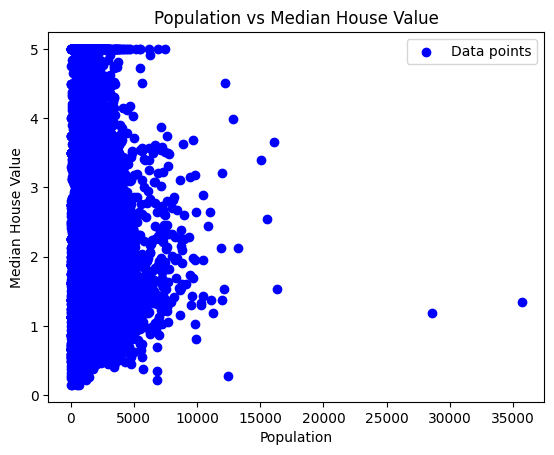

### Visualization of Population

This scatter plot shows the relationship between the selected feature **Population** and the target variable **Median House Value**. Each blue point represents a data instance from the dataset. If preprocessing was selected, the feature values have been scaled accordingly.

### Model Evaluation

**Mean Squared Error:** 1.3042488225221651

**R^2 Score:** -0.00022540672753823543

The Mean Squared Error (MSE) measures the average squared difference between the actual and predicted values. A lower MSE indicates a better fit. The R² Score indicates the proportion of the variance in the target variable that is predictable from the features. An R² score close to 1 indicates a better fit.

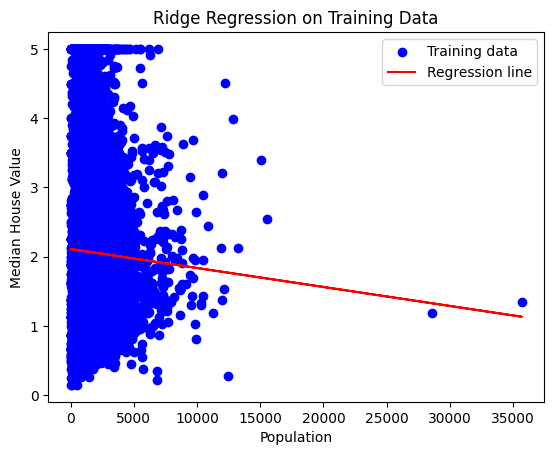

### Ridge Regression on Training Data

This plot shows the Ridge Regression model fitted on the training data. The blue points represent the training data, and the red line represents the regression line fitted by the model.

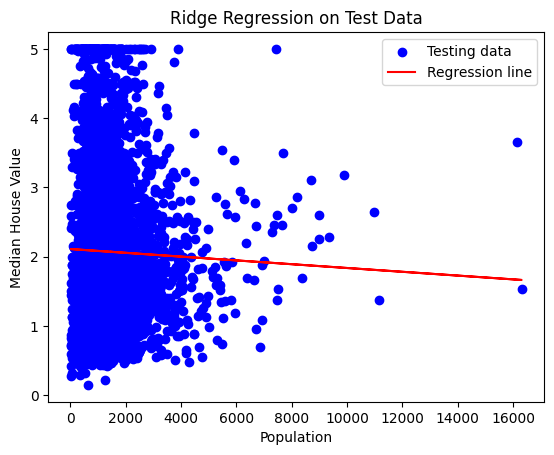

### Ridge Regression on Test Data

This plot shows the Ridge Regression model predictions on the test data. The blue points represent the test data, and the red line represents the regression line predicted by the model. Comparing this plot with the training data plot helps to assess the model's performance on unseen data.

### Model Evaluation

**Mean Squared Error:** 1.3042488225221283

**R^2 Score:** -0.00022540672751003576

The Mean Squared Error (MSE) measures the average squared difference between the actual and predicted values. A lower MSE indicates a better fit. The R² Score indicates the proportion of the variance in the target variable that is predictable from the features. An R² score close to 1 indicates a better fit.

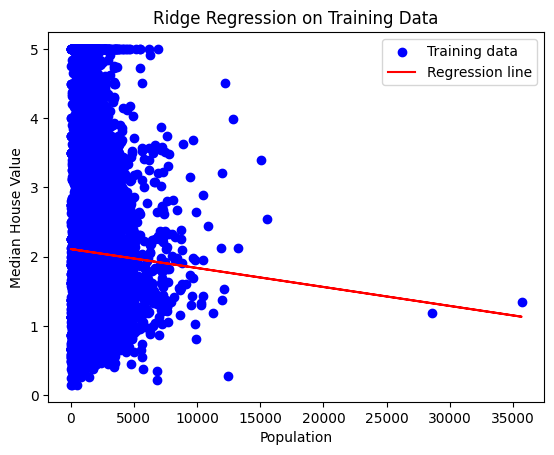

### Ridge Regression on Training Data

This plot shows the Ridge Regression model fitted on the training data. The blue points represent the training data, and the red line represents the regression line fitted by the model.

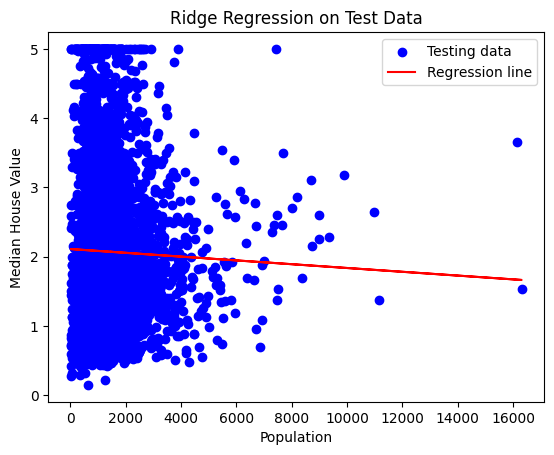

### Ridge Regression on Test Data

This plot shows the Ridge Regression model predictions on the test data. The blue points represent the test data, and the red line represents the regression line predicted by the model. Comparing this plot with the training data plot helps to assess the model's performance on unseen data.

In [8]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, r2_score
import ipywidgets as widgets
from IPython.display import display, Markdown

# Load the California Housing dataset from scikit-learn
housing = fetch_california_housing()

# Convert the dataset to a pandas DataFrame for easier handling
data = pd.DataFrame(housing.data, columns=housing.feature_names)
data['MedHouseVal'] = housing.target  # Add the target column (median house value) to the DataFrame

# Function to display dataset information
def display_data_info():
    # Display the dataset information and structure
    display(Markdown("### Dataset Information"))
    display(Markdown("The California Housing dataset contains information about housing prices in California."))
    display(Markdown(f"**Number of instances:** {data.shape[0]}"))
    display(Markdown(f"**Number of features:** {data.shape[1] - 1}"))
    display(Markdown(f"**Features:** {', '.join(housing.feature_names)}"))
    display(Markdown("**Target:** MedHouseVal (Median House Value)"))
    display(Markdown("### First 5 Rows of the Dataset"))
    display(data.head())  # Display the first 5 rows of the dataset

# Function to visualize the dataset
def visualize_data(feature, preprocess):
    # Select the feature and the target from the dataset
    X = data[[feature]].values  # Feature
    y = data['MedHouseVal'].values  # Target

    # Preprocess the feature if selected
    if preprocess == 'Standard Scaler':
        scaler = StandardScaler()
        X = scaler.fit_transform(X)
    elif preprocess == 'Min-Max Scaler':
        scaler = MinMaxScaler()
        X = scaler.fit_transform(X)
    elif preprocess == 'Robust Scaler':
        scaler = RobustScaler()
        X = scaler.fit_transform(X)

    # Create a scatter plot to visualize the relationship between the selected feature and the target
    plt.scatter(X, y, color='blue', label='Data points')
    plt.title(f'{feature} vs Median House Value')
    plt.xlabel(feature)
    plt.ylabel('Median House Value')
    plt.legend()
    plt.show()
    # Display explanation of the visualization
    display(Markdown(f"### Visualization of {feature}"))
    display(Markdown(f"This scatter plot shows the relationship between the selected feature **{feature}** and the target variable **Median House Value**. Each blue point represents a data instance from the dataset. If preprocessing was selected, the feature values have been scaled accordingly."))

# Function to perform Regularization (Ridge, Lasso, Elastic Net) with preprocessing
def perform_regularization(feature, preprocess, method, alpha):
    # Select the feature and the target from the dataset
    X = data[[feature]].values  # Feature
    y = data['MedHouseVal'].values  # Target

    # Preprocess the feature if selected
    scaler = None
    if preprocess == 'Standard Scaler':
        scaler = StandardScaler()
        X = scaler.fit_transform(X)
    elif preprocess == 'Min-Max Scaler':
        scaler = MinMaxScaler()
        X = scaler.fit_transform(X)
    elif preprocess == 'Robust Scaler':
        scaler = RobustScaler()
        X = scaler.fit_transform(X)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Select the regularization method
    if method == 'Ridge':
        model = Ridge(alpha=alpha)
    elif method == 'Lasso':
        model = Lasso(alpha=alpha)
    elif method == 'Elastic Net':
        model = ElasticNet(alpha=alpha)
    else:
        model = LinearRegression()  # Fallback to Linear Regression

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model using Mean Squared Error (MSE) and R-squared (R²) score
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Display the evaluation metrics
    display(Markdown("### Model Evaluation"))
    display(Markdown(f"**Mean Squared Error:** {mse}"))
    display(Markdown(f"**R^2 Score:** {r2}"))
    display(Markdown("The Mean Squared Error (MSE) measures the average squared difference between the actual and predicted values. A lower MSE indicates a better fit. The R² Score indicates the proportion of the variance in the target variable that is predictable from the features. An R² score close to 1 indicates a better fit."))

    # Plot the regression line on the training data
    plt.scatter(X_train, y_train, color='blue', label='Training data')
    plt.plot(X_train, model.predict(X_train), color='red', label='Regression line')
    plt.title(f'{method} Regression on Training Data')
    plt.xlabel(feature)
    plt.ylabel('Median House Value')
    plt.legend()
    plt.show()
    display(Markdown(f"### {method} Regression on Training Data"))
    display(Markdown(f"This plot shows the {method} Regression model fitted on the training data. The blue points represent the training data, and the red line represents the regression line fitted by the model."))

    # Plot the regression line on the test data
    plt.scatter(X_test, y_test, color='blue', label='Testing data')
    plt.plot(X_test, y_pred, color='red', label='Regression line')
    plt.title(f'{method} Regression on Test Data')
    plt.xlabel(feature)
    plt.ylabel('Median House Value')
    plt.legend()
    plt.show()
    display(Markdown(f"### {method} Regression on Test Data"))
    display(Markdown(f"This plot shows the {method} Regression model predictions on the test data. The blue points represent the test data, and the red line represents the regression line predicted by the model. Comparing this plot with the training data plot helps to assess the model's performance on unseen data."))

    return model, scaler

# Function to make predictions with new input values
def make_predictions(model, scaler, feature, input_value):
    # Preprocess the input value if a scaler is provided
    if scaler:
        input_value = scaler.transform(np.array([[input_value]]))

    # Make prediction
    prediction = model.predict(input_value)

    # Display the prediction
    display(Markdown(f"### Prediction for {feature} = {input_value[0][0] if scaler else input_value[0]}"))
    display(Markdown(f"**Predicted Median House Value:** {prediction[0]}"))

# Create a dropdown widget for selecting the feature to visualize and use for Regularization
feature_dropdown = widgets.Dropdown(
    options=housing.feature_names,
    value='AveRooms',  # Default value
    description='Feature:',
    disabled=False,
)

# Create a dropdown widget for selecting the preprocessing method
preprocess_dropdown = widgets.Dropdown(
    options=['None', 'Standard Scaler', 'Min-Max Scaler', 'Robust Scaler'],
    value='None',  # Default value
    description='Preprocess:',
    disabled=False,
)

# Create a dropdown widget for selecting the regularization method
method_dropdown = widgets.Dropdown(
    options=['Ridge', 'Lasso', 'Elastic Net'],
    value='Ridge',  # Default value
    description='Method:',
    disabled=False,
)

# Create a float input widget for entering the alpha value (regularization strength)
alpha_input = widgets.FloatText(
    value=1.0,
    description='Alpha:',
    disabled=False,
)

# Create a float input widget for entering a new value to make predictions
input_value = widgets.FloatText(
    value=0.0,
    description='Input Value:',
    disabled=False,
)

# Create buttons for interactive actions
display_data_button = widgets.Button(description="Display Dataset Info")
visualize_data_button = widgets.Button(description="Visualize Data")
perform_regression_button = widgets.Button(description="Perform Regression")
predict_button = widgets.Button(description="Make Prediction")

# Display the button for showing dataset information
display(display_data_button)
# Attach the display_data_info function to the button click event
display_data_button.on_click(lambda b: display_data_info())

# Display the dropdowns and button for visualizing data
display(feature_dropdown)
display(preprocess_dropdown)
display(visualize_data_button)
# Attach the visualize_data function to the button click event
visualize_data_button.on_click(lambda b: visualize_data(feature_dropdown.value, preprocess_dropdown.value))

# Display the dropdowns, alpha input, and button for performing Regularization
display(method_dropdown)
display(preprocess_dropdown)
display(feature_dropdown)
display(alpha_input)
display(perform_regression_button)
# Initialize variables for model and scaler
model = None
scaler = None
# Attach the perform_regularization function to the button click event
def perform_regularization_action(b):
    global model, scaler
    model, scaler = perform_regularization(feature_dropdown.value, preprocess_dropdown.value, method_dropdown.value, alpha_input.value)

perform_regression_button.on_click(perform_regularization_action)

# Display the float input and button for making predictions
display(input_value)
display(predict_button)
# Attach the make_predictions function to the button click event
predict_button.on_click(lambda b: make_predictions(model, scaler, feature_dropdown.value, input_value.value))
